# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

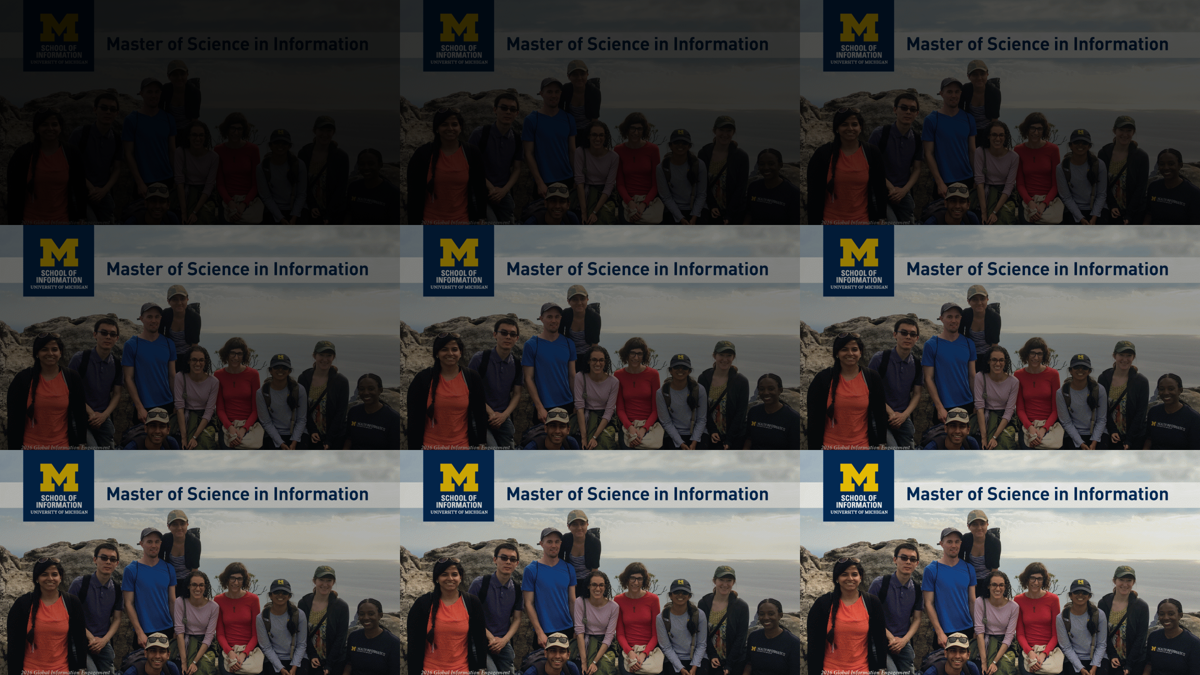

In [1]:
import PIL
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageColor

# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

### Will use the idea of two Image Instances for Drawing
* Below is a Code Snippet to Create a Black Box type image instance set to same width and a fraction of the height of the original image
* The Concatenated Image will first be created as an Image Instance to be pasted over
    * Width second_arg tup(0) argument simply the image width
    * Height second_arg tup(1) argument is the combination of the original image height plus `black_box` height
* Image instance has `.paste` class method which is called initally to set the original image on top and subsequently to paste the black_box underneath by defining the Height argument specification 

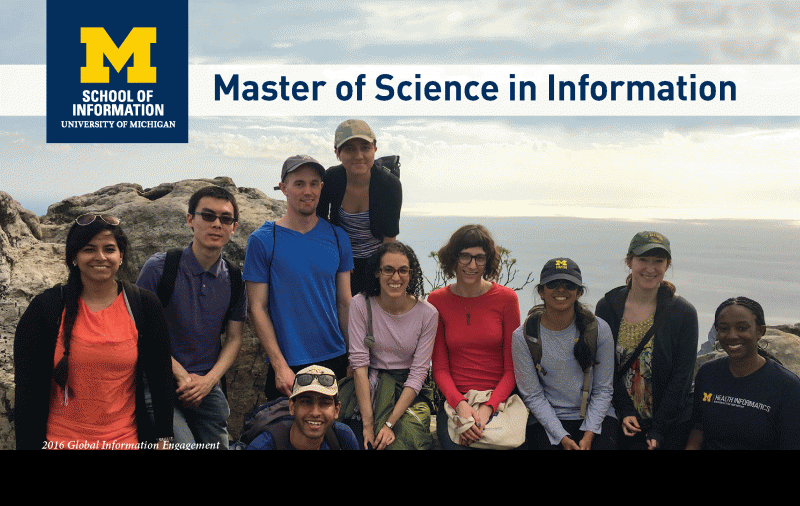

In [6]:
# Concatenate Images for black lower bottom for later text
import PIL
from PIL import Image
from IPython.display import display

# And lets load the image we were working, and we can just convert it to RGB inline
file="../ReadOnly/msi_recruitment.gif"
image=Image.open(file).convert('RGB')
black_box= Image.new('RGB', (image.width, int(image.height/8)))
concat_image = Image.new('RGB', (image.width, image.height + black_box.height))
concat_image.paste(image, (0, 0))
concat_image.paste(black_box, (0, image.height))


display(concat_image)
#print(dir(image))

### Initial Code for First Stab 
* Below is a bit of a redundant code cell to draw on a text instance prior to creating a lower black box type figure for Image drawing and canvas (r,g,b) specification

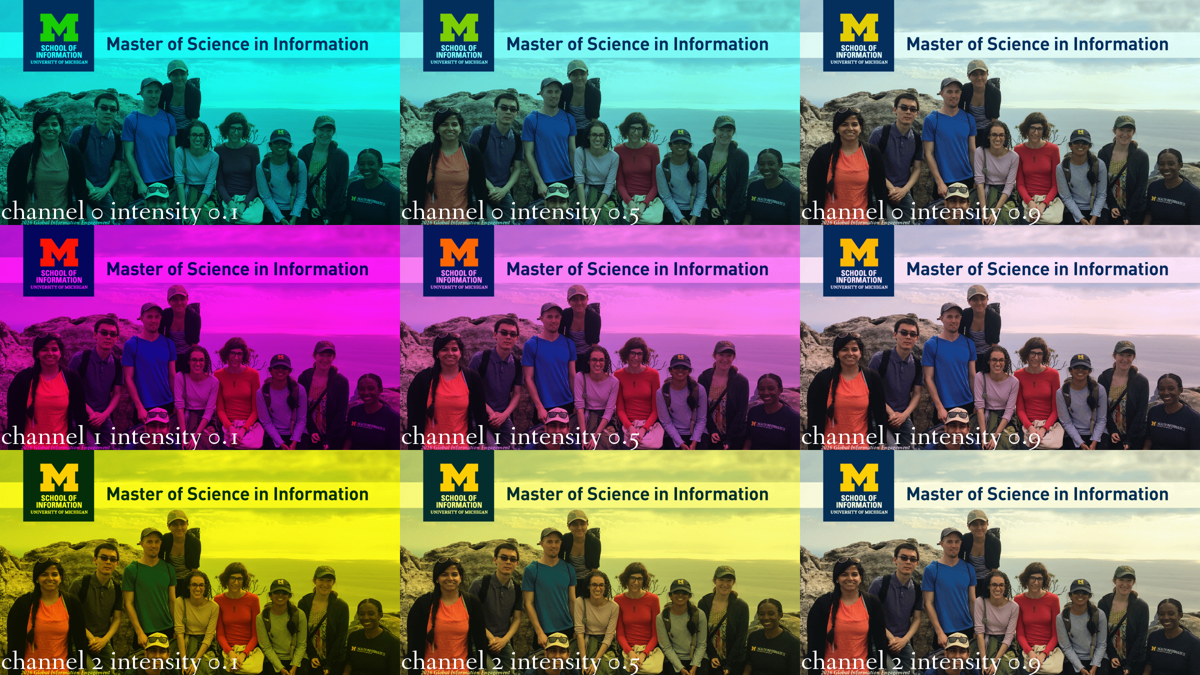

In [7]:
# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different channel colors
# Set Dictionary values for row/column type association for rgb setting in following loop and based on column value,
# set the r/g/b type as : use three different intensities, 0.1 (reduce the channel a lot),
# 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit)

images_deux = []
img_idx_dict = {1:[0, 0.1], 2:[0, 0.5], 3:[0, 0.9], 4:[1, 0.1], 5:[1, 0.5], 6:[1, 0.9], 
                7:[2, 0.1], 8:[2, 0.5], 9:[2, 0.9]}

# image=Image.open(file).convert('RGB')
# black_box= Image.new('RGB', (image.width, int(image.height/8)))
# concat_image = Image.new('RGB', (image.width, image.height + black_box.height))
# concat_image.paste(image, (0, 0))
# concat_image.paste(black_box, (0, image.height))

def black_box_image_combined(img):
    # Image new defaults to black (same width but just about an 1/8 of the hieght for the lower text)
    black_box = Image.new('RGB', (img.width, int(img.height/6)))
    concat_img = Image.new('RGB', (img.width, img.height + black_box.height))
    concat_image.paste(img, (0, 0))
    concat_image.paste(black_box, (0, img.height))
    return concat_image

for l in range(1, 10):
    # nifty way to use tuple association for the image splitting after converting to 'rgb'
    r, g, b = image.split()
    # first column of .1 
    if l in [1, 4, 7]:
        if l == 1:
            r = r.point(lambda i: i * .1)
        elif l == 4:
            g = g.point(lambda i: i * .1)
        else:
            b = b.point(lambda i: i * .1)
        img = Image.merge('RGB', (r, g, b))
        #concat_image = black_box_image_combined(img)
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, 400), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left')
        images_deux.append(img)
    if l in [2, 5, 8]:
        if l == 2:
            r = r.point(lambda i: i * .5)
        elif l == 5:
            g = g.point(lambda i: i * .5)
        else:
            b = b.point(lambda i: i * .5)
        img = Image.merge('RGB', (r, g, b))
        #concat_image = black_box_image_combined(img)
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, 400), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left')
        images_deux.append(img)
    if l in [3, 6, 9]:
        if l == 3:
            r = r.point(lambda i: i * .9)
        elif l == 6:
            g = g.point(lambda i: i * .9)
        else:
            b = b.point(lambda i: i * .9)
        img = Image.merge('RGB', (r, g, b))
        #concat_image = black_box_image_combined(img)
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, 400), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left')
        images_deux.append(img)
    

first_image_2=images_deux[0]
#print(first_image_2, dir(first_image_2))
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
        
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width

# resize and display the contact sheet
contact_sheet_2 = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet_2)
        


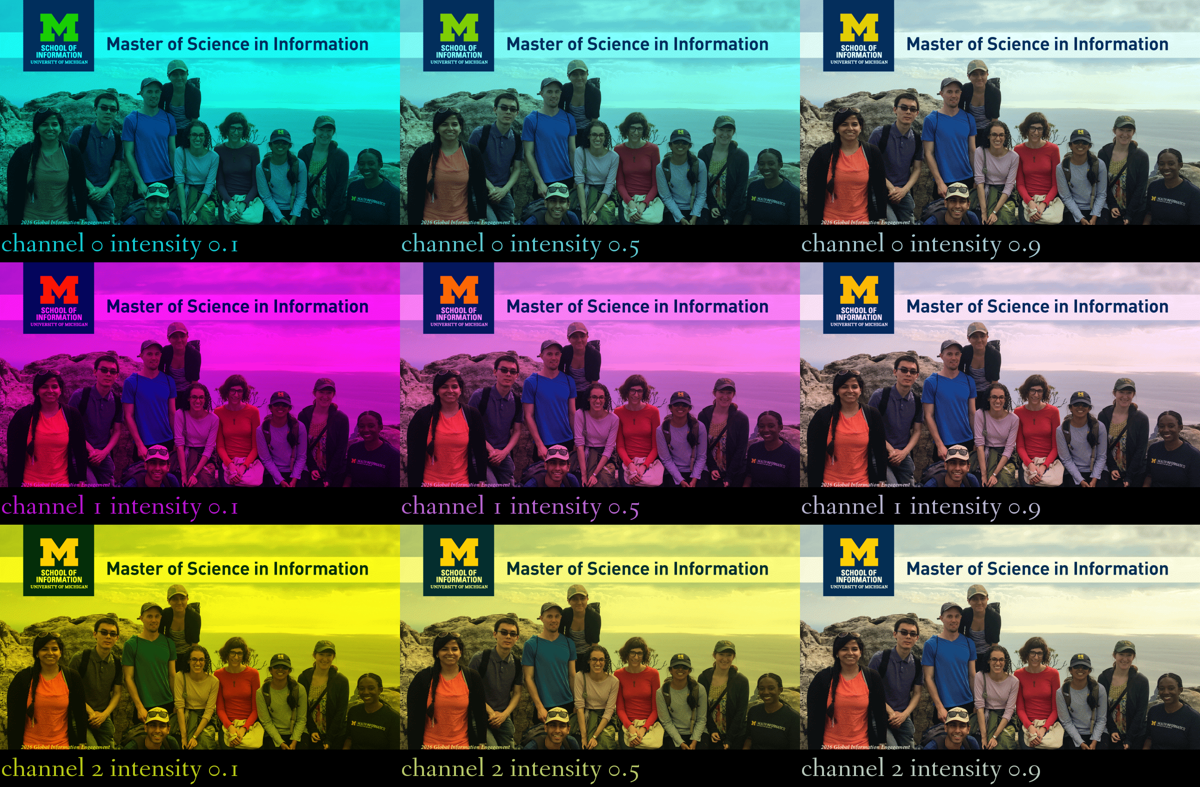

In [4]:
# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different channel colors
# Set Dictionary values for row/column type association for rgb setting in following loop and based on column value,
# set the r/g/b type as : use three different intensities, 0.1 (reduce the channel a lot),
# 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit)

images_deux = []
img_idx_dict = {1:[0, 0.1], 2:[0, 0.5], 3:[0, 0.9], 4:[1, 0.1], 5:[1, 0.5], 6:[1, 0.9], 
                7:[2, 0.1], 8:[2, 0.5], 9:[2, 0.9]}



def black_box_image_combined(img):
    # Image new defaults to black (same width but just about an 1/8 of the hieght for the lower text)
    black_box = Image.new('RGB', (img.width, int(img.height/6)))
    # New image set to height of new additive black box height property
    concat_img = Image.new('RGB', (img.width, img.height + black_box.height))
    concat_img.paste(img, (0, 0))
    concat_img.paste(black_box, (0, img.height))
    #display(concat_img)
    return concat_img

for l in range(1, 10):
    # Use default image and add a black box (not cropping as will write in this box)
    concat_image = black_box_image_combined(image)
    # nifty way to use tuple association for the image splitting 
    r, g, b = concat_image.split()
    # use number type index to set image to be added to the array to loop through after for setting contact image
    # https://stackoverflow.com/questions/59320564/how-to-access-and-change-color-channels-using-pil
    if l in [1, 4, 7]:
        if l == 1:
            r = r.point(lambda i: i * .1)
        elif l == 4:
            g = g.point(lambda i: i * .1)
        else:
            b = b.point(lambda i: i * .1)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    if l in [2, 5, 8]:
        if l == 2:
            r = r.point(lambda i: i * .5)
        elif l == 5:
            g = g.point(lambda i: i * .5)
        else:
            b = b.point(lambda i: i * .5)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    if l in [3, 6, 9]:
        if l == 3:
            r = r.point(lambda i: i * .9)
        elif l == 6:
            g = g.point(lambda i: i * .9)
        else:
            b = b.point(lambda i: i * .9)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    
# Use any image (just chose first) to set width and height properties for new contact sheet to paste into
first_image_2=images_deux[0]
# Create Contact Sheet
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
        
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width

# resize and display the contact sheet
contact_sheet_2 = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet_2)

### Defined Methods Assignment Submission
* Below is a doc_string for two methods used by the logic for the assignment to clean up the above a bit

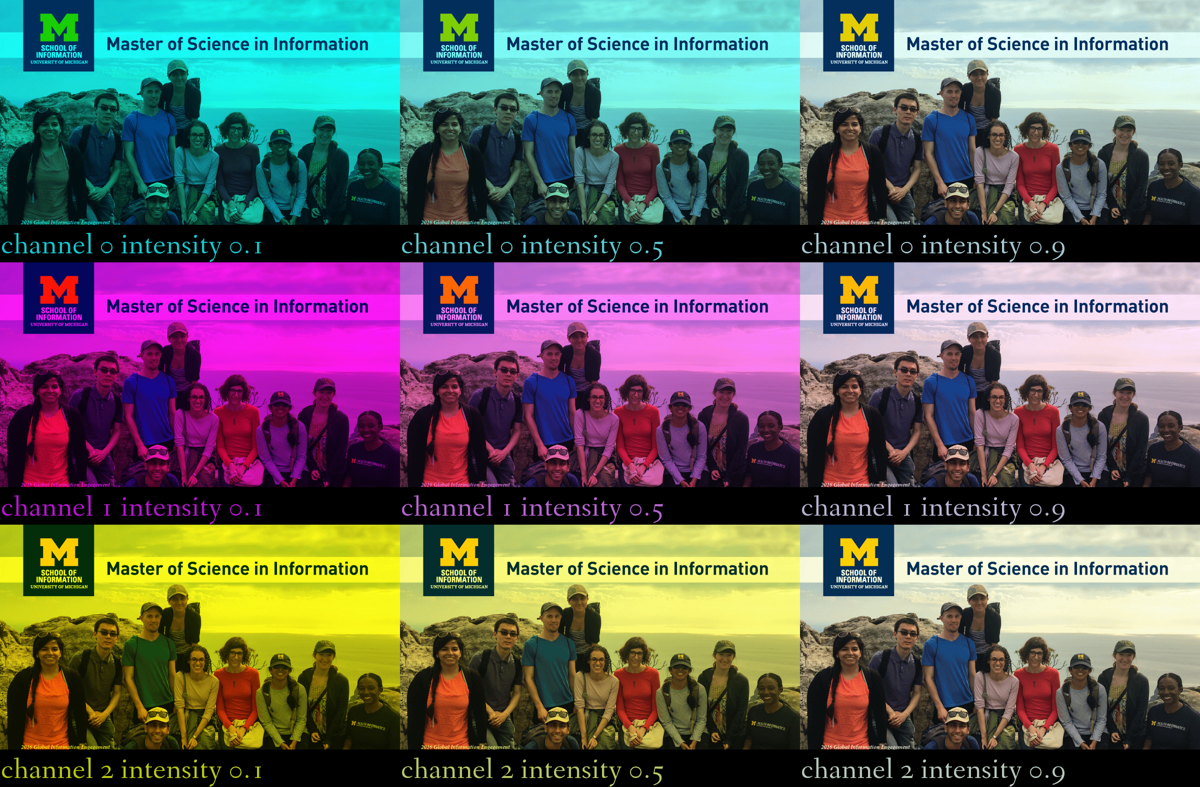

In [8]:
# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different channel colors
# Set Dictionary values for row/column type association for rgb setting in following loop and based on column value,
# set the r/g/b type as : use three different intensities, 0.1 (reduce the channel a lot),
# 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit)

images_deux = []
img_idx_dict = {1:[0, 0.1], 2:[0, 0.5], 3:[0, 0.9], 4:[1, 0.1], 5:[1, 0.5], 6:[1, 0.9], 
                7:[2, 0.1], 8:[2, 0.5], 9:[2, 0.9]}



def black_box_image_combined(img):
    """
    Summary :
    Function takes img passed and returns a new image with a black box added "concatenated"
    onto original image passed. When initially set the concat_img variable creates a new Image instance
    to the same width of the existing image while adding in the height for the 'black_box' created Image instance
    so that the template image can have the two separate images subsequently pasted with the Image.paste method.
    
    Parameters:
    img (PIL.image) : Image class instance from Python PIL Module
    
    Returns : 
    Image instance from PIL module with a lower black_box returned for drawing on the original image. 
    The created "text" type lower box will be 1/6 of the height of the original picture received 
    in the function invocation.
    """
    # Image new defaults to black (same width but just about an 1/8 of the hieght for the lower text)
    black_box = Image.new('RGB', (img.width, int(img.height/6)))
    # New image set to height of new additive black box height property
    concat_img = Image.new('RGB', (img.width, img.height + black_box.height))
    concat_img.paste(img, (0, 0))
    concat_img.paste(black_box, (0, img.height))
    #display(concat_img)
    return concat_img

def draw_concat_image(img, i, font='fanwood-webfont.ttf', size=60):
    """
    Summary : 
    Function takes two images concatenated through each iteration below and iterator type values from
    range function to mark the channel and intensity values for the output below. The function can accept different
    fonts or sizes to customize if desired for similar 3x3 channel image
    
    Parameters:
    img (PIL.Image) : Image class object instance to draw on
    i (Iterator value): 3x3 channel type value correlating to img dictionary above for channel/figure drawing
    font (tff font style): Font style to apply to text method draw with ImageDraw instance called on passed function Image
    size (int): Size to apply to font drawn on image
    
    Returns:
    img(PIL.Image) : Images that has been drawn on for text to fill lower 1/6 band of image (ideal for a black box)
    """
    draw = ImageDraw.Draw(img)
    font_argument = ImageFont.truetype(font, size)
    # drawns on left size of image for height of concatenated images on black type lower added to original image
    # Use pixel rgb value to give text a similar channel look
    draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[i][0], img_idx_dict[i][1]),
             font=font_argument, align='left', fill=img.getpixel((0, 0)))
    return img
    

for l in range(1, 10):
    # Use default image and add a black box (not cropping as will write in this box)
    concat_image = black_box_image_combined(image)
    # nifty way to use tuple association for the image splitting 
    r, g, b = concat_image.split()
    # use number type index to set image to be added to the array to loop through after for setting contact image
    # https://stackoverflow.com/questions/59320564/how-to-access-and-change-color-channels-using-pil
    if l in [1, 4, 7]:
        if l == 1:
            r = r.point(lambda i: i * .1)
        elif l == 4:
            g = g.point(lambda i: i * .1)
        else:
            b = b.point(lambda i: i * .1)
        img = Image.merge('RGB', (r, g, b))
        img = draw_concat_image(img, l)
        images_deux.append(img)
    if l in [2, 5, 8]:
        if l == 2:
            r = r.point(lambda i: i * .5)
        elif l == 5:
            g = g.point(lambda i: i * .5)
        else:
            b = b.point(lambda i: i * .5)
        img = Image.merge('RGB', (r, g, b))
        img = draw_concat_image(img, l)
        images_deux.append(img)
    if l in [3, 6, 9]:
        if l == 3:
            r = r.point(lambda i: i * .9)
        elif l == 6:
            g = g.point(lambda i: i * .9)
        else:
            b = b.point(lambda i: i * .9)
        img = Image.merge('RGB', (r, g, b))
        img = draw_concat_image(img, l)
        images_deux.append(img)
    
# Use any image (just chose first) to set width and height properties for new contact sheet to paste into
first_image_2=images_deux[0]
# Create Contact Sheet
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
        
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width

# resize and display the contact sheet
contact_sheet_2 = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet_2)

## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.